##### Imports


In [1]:
import sympy as sp
from tabulate import tabulate
import time
import matplotlib.pyplot as plt


### Function and variable declarations considering Carbon dioxide gas


In [2]:
# storing data into variable considering CO2

prop = {
    'a': 6.46,  # Pa(K^0.5)(m3/mol)^2
    'b': 2.97e-5,  # m3/mol
    'R': 08.314,  # m3Pa/molK
    'T': 340,  # K
    'P': 1e7  # Pa
}

# source: http://che31.weebly.com/uploads/3/7/4/3/3743741/handout_e-realgasconstants.pdf


In [3]:
# creating function
Vm, P, R, T, b, a = sp.symbols('Vm P R T b a', real=True)

fn = (P*(Vm-b)) - (R*T) + (a*(Vm-b)/(sp.root(T, 2)*Vm*(Vm+b)))
fn


P*(Vm - b) - R*T + a*(Vm - b)/(sqrt(T)*Vm*(Vm + b))

In [4]:
# substituting values
fn = fn.subs([
    (P, prop['P']),
    (R, prop['R']),
    (T, prop['T']),
    (a, prop['a']),
    (b, prop['b']),
]).evalf()
fn


10000000.0*Vm - 3123.76 + 0.35034268937713*(Vm - 2.97e-5)/(Vm*(Vm + 2.97e-5))

### 1) Direct Substitution Method


In [5]:
g_x = (b) + ((R*T)/P) - (a*(Vm-b)/(sp.root(T, 2)*Vm*P*(Vm+b)))
g_x


b + R*T/P - a*(Vm - b)/(P*sqrt(T)*Vm*(Vm + b))

In [6]:
g_x = g_x.subs([
    (P, prop['P']),
    (R, prop['R']),
    (T, prop['T']),
    (a, prop['a']),
    (b, prop['b']),
]).evalf()

g_x


0.000312376 - 3.5034268937713e-8*(Vm - 2.97e-5)/(Vm*(Vm + 2.97e-5))

In [7]:
itr_table = []
itr_array = []
error_array = []
# direct substitution method function


def Fixed_Point(fn, g_x, Vm_prev, tol, itr=1):
    decimal_places = int(-sp.log(tol, 10).evalf()+1)

    # direct substitution definition: Xk+1 = g(Xk)
    Vm_next = (g_x).subs(Vm, Vm_prev).round(decimal_places)
    err = abs(Vm_next - Vm_prev)
    # store the iteration in table
    itr_table.append([itr,
                      Vm_prev,
                      Vm_next,
                      fn.subs(Vm, Vm_prev).round(6),
                      fn.subs(Vm, Vm_next).round(decimal_places),
                      err])
    itr_array[-1].append(itr)
    error_array[-1].append(err)

    # if less than tolerance then return
    if abs(Vm_next - Vm_prev) < tol:
        return Vm_next

    # else go for next iteration
    itr += 1
    return Fixed_Point(fn, g_x, Vm_next, tol, itr)


In [8]:
# obtaining value and printing value for tolerance 1e-6
itr_array.append([])
error_array.append([])
itr_table = [['itr', 'Vm_prev', 'Vm_next',
              'fn(Vm_prev)', 'fn(Vm_next)', 'error']]
initial_guess = 0.0005
tolerance = 1e-6
start = time.time()
result_Fixed_Point = Fixed_Point(fn, g_x, initial_guess, tolerance)
end = time.time()
print('Vm:', str(result_Fixed_Point)+'m3/mol')
print(f'Time taken: {end-start} second')
print(tabulate(itr_table, headers='firstrow', tablefmt='fancy_grid'))


Vm: 0.0001656m3/mol
Time taken: 0.14228224754333496 second
╒═══════╤═════════════╤═════════════╤═══════════════╤═══════════════╤═════════════╕
│   itr │     Vm_prev │     Vm_next │   fn(Vm_prev) │   fn(Vm_next) │       error │
╞═══════╪═════════════╪═════════════╪═══════════════╪═══════════════╪═════════════╡
│     1 │ 0.0005      │ 0.000250202 │    2498.35    │     481.344   │ 0.000249798 │
├───────┼─────────────┼─────────────┼───────────────┼───────────────┼─────────────┤
│     2 │ 0.000250202 │ 0.000202101 │     481.344   │     186.527   │ 4.81009e-05 │
├───────┼─────────────┼─────────────┼───────────────┼───────────────┼─────────────┤
│     3 │ 0.000202101 │ 0.0001834   │     186.527   │      88.0306  │ 1.8701e-05  │
├───────┼─────────────┼─────────────┼───────────────┼───────────────┼─────────────┤
│     4 │ 0.0001834   │ 0.000174601 │      88.0306  │      45.3916  │ 8.79914e-06 │
├───────┼─────────────┼─────────────┼───────────────┼───────────────┼─────────────┤
│     5 │ 0.00017

In [9]:
# obtaining value and printing value for tolerance 1e-6
itr_array.append([])
error_array.append([])
itr_table = [['itr', 'Vm_prev', 'Vm_next',
              'fn(Vm_prev)', 'fn(Vm_next)', 'error']]
initial_guess = 0.0005
tolerance = 1e-8
start = time.time()
result_Fixed_Point = Fixed_Point(fn, g_x, initial_guess, tolerance)
end = time.time()
print('Vm:', str(result_Fixed_Point)+'m3/mol')
print(f'Time taken: {end-start} second')
print(tabulate(itr_table, headers='firstrow', tablefmt='fancy_grid'))


Vm: 0.000164611m3/mol
Time taken: 0.24943947792053223 second
╒═══════╤═════════════╤═════════════╤═══════════════╤═══════════════╤═════════════╕
│   itr │     Vm_prev │     Vm_next │   fn(Vm_prev) │   fn(Vm_next) │       error │
╞═══════╪═════════════╪═════════════╪═══════════════╪═══════════════╪═════════════╡
│     1 │ 0.0005      │ 0.000250165 │   2498.35     │   481.098     │ 0.000249835 │
├───────┼─────────────┼─────────────┼───────────────┼───────────────┼─────────────┤
│     2 │ 0.000250165 │ 0.000202055 │    481.098    │   186.281     │ 4.811e-05   │
├───────┼─────────────┼─────────────┼───────────────┼───────────────┼─────────────┤
│     3 │ 0.000202055 │ 0.000183427 │    186.281    │    88.1682    │ 1.8628e-05  │
├───────┼─────────────┼─────────────┼───────────────┼───────────────┼─────────────┤
│     4 │ 0.000183427 │ 0.00017461  │     88.1682   │    45.4311    │ 8.81701e-06 │
├───────┼─────────────┼─────────────┼───────────────┼───────────────┼─────────────┤
│     5 │ 0.000

In [10]:
# obtaining value and printing value for tolerance 1e-10
itr_array.append([])
error_array.append([])
itr_table = [['itr', 'Vm_prev', 'Vm_next',
              'fn(Vm_prev)', 'fn(Vm_next)', 'error']]
initial_guess = 0.0005
tolerance = 1e-10
start = time.time()
result_Fixed_Point = Fixed_Point(fn, g_x, initial_guess, tolerance)
end = time.time()
print('Vm:', str(result_Fixed_Point)+'m3/mol')
print(f'Time taken: {end-start} second')
print(tabulate(itr_table, headers='firstrow', tablefmt='fancy_grid'))


Vm: 0.00016460129m3/mol
Time taken: 0.24922442436218262 second
╒═══════╤═════════════╤═════════════╤════════════════╤═══════════════╤═════════════╕
│   itr │     Vm_prev │     Vm_next │    fn(Vm_prev) │   fn(Vm_next) │       error │
╞═══════╪═════════════╪═════════════╪════════════════╪═══════════════╪═════════════╡
│     1 │ 0.0005      │ 0.000250165 │ 2498.35        │ 481.098       │ 0.000249835 │
├───────┼─────────────┼─────────────┼────────────────┼───────────────┼─────────────┤
│     2 │ 0.000250165 │ 0.000202055 │  481.098       │ 186.281       │ 4.81098e-05 │
├───────┼─────────────┼─────────────┼────────────────┼───────────────┼─────────────┤
│     3 │ 0.000202055 │ 0.000183427 │  186.281       │  88.168       │ 1.86281e-05 │
├───────┼─────────────┼─────────────┼────────────────┼───────────────┼─────────────┤
│     4 │ 0.000183427 │ 0.00017461  │   88.168       │  45.4318      │ 8.8168e-06  │
├───────┼─────────────┼─────────────┼────────────────┼───────────────┼─────────────┤
│ 

8


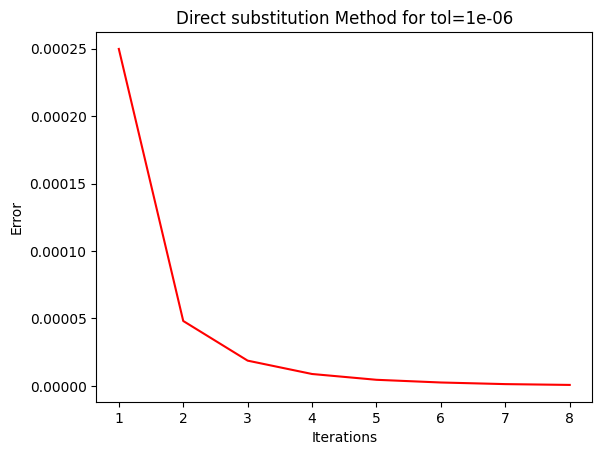

16


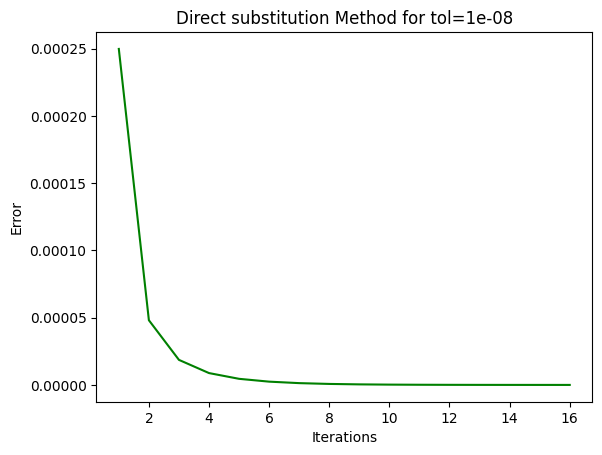

24


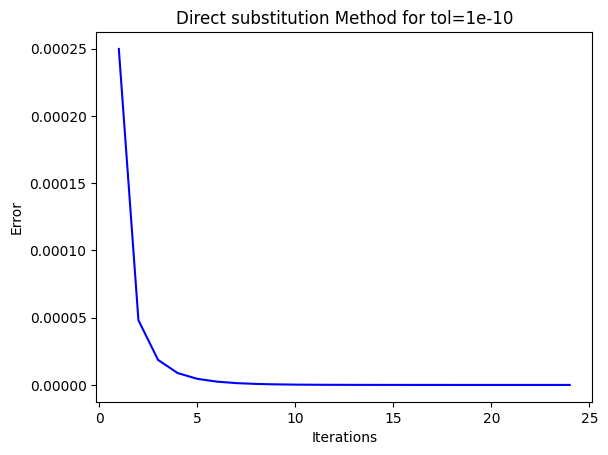

In [11]:
color = ["red", "green", "blue"]
tol_arr = [1e-6, 1e-8, 1e-10]


for (_x, _y, _color, _tol) in zip(itr_array, error_array, color, tol_arr):
    plt.xlabel("Iterations")
    plt.ylabel("Error")
    plt.title(f"Direct substitution Method for tol={_tol}")
    plt.plot(_x, _y, color=_color)
    plt.show()


### 2) Wegstein Convergence Accelerator


In [12]:
g = (fn - (98.69*Vm))/(-98.69)
g


-101326.388793191*Vm + 31.6522444016618 - 0.00354993098973685*(Vm - 2.97e-5)/(Vm*(Vm + 2.97e-5))

In [13]:
itr_table = []
itr_array = []
error_array = []

# WCA function


def WCA(fn, Vm_0, Vm_1, tol, itr=1):
    decimal_places = int(-sp.log(tol, 10).evalf()+1)

    s = (g.subs(Vm, Vm_1).round(decimal_places) -
         g.subs(Vm, Vm_0).round(decimal_places))/(Vm_1-Vm_0)
    q = s/(s-1)
    Vm_next = (1-q)*(g.subs(Vm, Vm_1).round(decimal_places)) + q*Vm_1
    err = abs(Vm_next - Vm_1)
    # store the iteration in table
    itr_table.append([itr,
                      Vm_1,
                      Vm_next,
                      g.subs(Vm, Vm_1).round(6),
                      g.subs(Vm, Vm_next).round(decimal_places),
                      s,
                      q,
                      err])
    itr_array[-1].append(itr)
    error_array[-1].append(err)

    # if less than tolerance then return
    if err < tol:
        return Vm_next

    # else go for next iteration
    itr += 1
    return WCA(fn, Vm_1, Vm_next, tol, itr)


In [14]:
# obtaining value and printing value with tolerance  1e-6
itr_array.append([])
error_array.append([])
itr_table = [['itr', 'Vm_prev', 'Vm_next',
              'g(Vm_prev)', 'g(Vm_next)', 's', 'q', 'error']]
Vm_0 = 0.0001
Vm_1 = 0.0005
tolerance = 1e-6

start = time.time()
result_WCA = WCA(fn, Vm_0, Vm_1, tolerance)
end = time.time()
print('Vm:', str(result_WCA)+'m3/mol')
print(f'Time taken: {end-start} second')
print(tabulate(itr_table, headers='firstrow', tablefmt='fancy_grid'))


Vm: 0.000164600141886495m3/mol
Time taken: 0.04629921913146973 second
╒═══════╤═════════════╤═════════════╤══════════════╤══════════════╤══════════╤══════════╤═════════════╕
│   itr │     Vm_prev │     Vm_next │   g(Vm_prev) │   g(Vm_next) │        s │        q │       error │
╞═══════╪═════════════╪═════════════╪══════════════╪══════════════╪══════════╪══════════╪═════════════╡
│     1 │ 0.0005      │ 0.000133025 │ -25.3146     │    1.22845   │ -68982.3 │ 0.999986 │ 0.000366975 │
├───────┼─────────────┼─────────────┼──────────────┼──────────────┼──────────┼──────────┼─────────────┤
│     2 │ 0.000133025 │ 0.000150007 │   1.22845    │    0.609692  │ -72329.4 │ 0.999986 │ 1.69821e-05 │
├───────┼─────────────┼─────────────┼──────────────┼──────────────┼──────────┼──────────┼─────────────┤
│     3 │ 0.000150007 │ 0.000166736 │   0.609692   │   -0.0951494 │ -36436.1 │ 0.999973 │ 1.67286e-05 │
├───────┼─────────────┼─────────────┼──────────────┼──────────────┼──────────┼──────────┼─────────

In [15]:
# obtaining value and printing value with tolerance  1e-8
itr_array.append([])
error_array.append([])
itr_table = [['itr', 'Vm_prev', 'Vm_next',
              'g(Vm_prev)', 'g(Vm_next)', 's', 'q', 'error']]
Vm_0 = 0.0001
Vm_1 = 0.0005
tolerance = 1e-8

start = time.time()
result_WCA = WCA(fn, Vm_0, Vm_1, tolerance)
end = time.time()
print('Vm:', str(result_WCA)+'m3/mol')
print(f'Time taken: {end-start} second')
print(tabulate(itr_table, headers='firstrow', tablefmt='fancy_grid'))


Vm: 0.000164601190958472m3/mol
Time taken: 0.10098481178283691 second
╒═══════╤═════════════╤═════════════╤══════════════╤══════════════╤══════════╤══════════╤═════════════╕
│   itr │     Vm_prev │     Vm_next │   g(Vm_prev) │   g(Vm_next) │        s │        q │       error │
╞═══════╪═════════════╪═════════════╪══════════════╪══════════════╪══════════╪══════════╪═════════════╡
│     1 │ 0.0005      │ 0.000133025 │ -25.3146     │  1.22845     │ -68982.3 │ 0.999986 │ 0.000366975 │
├───────┼─────────────┼─────────────┼──────────────┼──────────────┼──────────┼──────────┼─────────────┤
│     2 │ 0.000133025 │ 0.000150007 │   1.22845    │  0.609692    │ -72329.4 │ 0.999986 │ 1.69821e-05 │
├───────┼─────────────┼─────────────┼──────────────┼──────────────┼──────────┼──────────┼─────────────┤
│     3 │ 0.000150007 │ 0.000166736 │   0.609692   │ -0.0951492   │ -36436.1 │ 0.999973 │ 1.67286e-05 │
├───────┼─────────────┼─────────────┼──────────────┼──────────────┼──────────┼──────────┼─────────

In [16]:
# obtaining value and printing value with tolerance  1e-10
itr_array.append([])
error_array.append([])
itr_table = [['itr', 'Vm_prev', 'Vm_next',
              'g(Vm_prev)', 'g(Vm_next)', 's', 'q', 'error']]
Vm_0 = 0.0001
Vm_1 = 0.0005
tolerance = 1e-10

start = time.time()
result_WCA = WCA(fn, Vm_0, Vm_1, tolerance)
end = time.time()
print('Vm:', str(result_WCA)+'m3/mol')
print(f'Time taken: {end-start} second')
print(tabulate(itr_table, headers='firstrow', tablefmt='fancy_grid'))


Vm: 0.000164601190428131m3/mol
Time taken: 0.28690123558044434 second
╒═══════╤═════════════╤═════════════╤═══════════════╤══════════════╤══════════╤══════════╤═════════════╕
│   itr │     Vm_prev │     Vm_next │    g(Vm_prev) │   g(Vm_next) │        s │        q │       error │
╞═══════╪═════════════╪═════════════╪═══════════════╪══════════════╪══════════╪══════════╪═════════════╡
│     1 │ 0.0005      │ 0.000133025 │ -25.3146      │  1.22845     │ -68982.3 │ 0.999986 │ 0.000366975 │
├───────┼─────────────┼─────────────┼───────────────┼──────────────┼──────────┼──────────┼─────────────┤
│     2 │ 0.000133025 │ 0.000150007 │   1.22845     │  0.609692    │ -72329.4 │ 0.999986 │ 1.69821e-05 │
├───────┼─────────────┼─────────────┼───────────────┼──────────────┼──────────┼──────────┼─────────────┤
│     3 │ 0.000150007 │ 0.000166736 │   0.609692    │ -0.0951492   │ -36436.1 │ 0.999973 │ 1.67286e-05 │
├───────┼─────────────┼─────────────┼───────────────┼──────────────┼──────────┼──────────┼

5


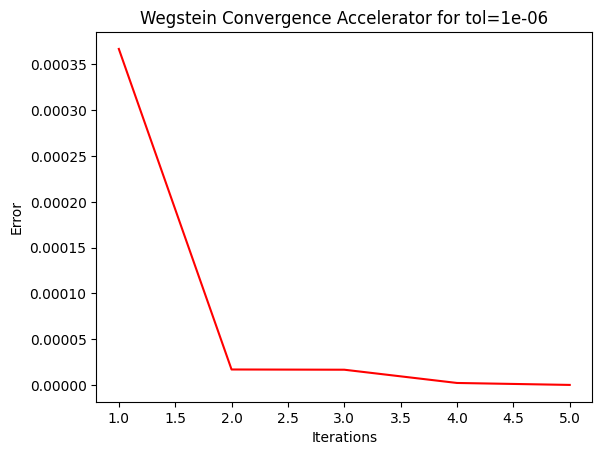

6


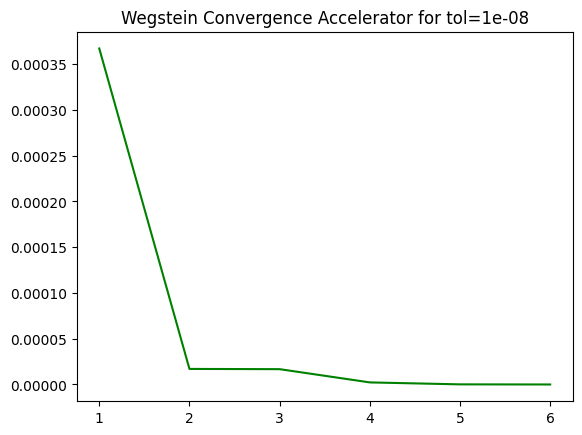

7


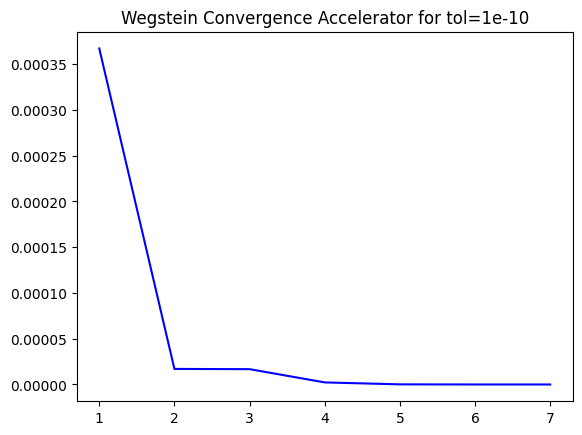

In [17]:


color = ["red", "green", "blue"]
tol_arr = [1e-6, 1e-8, 1e-10]


for (_x, _y, _color, _tol) in zip(itr_array, error_array, color, tol_arr):
    plt.xlabel("Iterations")
    plt.ylabel("Error")
    plt.title(f"Wegstein Convergence Accelerator for tol={_tol}")
    plt.plot(_x, _y, color=_color)
    plt.show()


### 3) Bisection Method


In [18]:
itr_table = []
itr_array = []
error_array = []

# Bisection function


def bisection(fn, Vm_0, Vm_1, tol, itr=1):
    decimal_places = int(-sp.log(tol, 10).evalf()+1)

    Vm_2 = (((Vm_0)+(Vm_1))/2)

    func_0 = fn.subs(Vm, Vm_0).round(decimal_places)
    func_1 = fn.subs(Vm, Vm_1).round(decimal_places)
    func_2 = fn.subs(Vm, Vm_2).round(decimal_places)

    if (func_0*func_2) < 0:
        err = abs(Vm_0-Vm_2)
        itr_table.append([itr,
                          Vm_0,
                          Vm_1,
                          Vm_2,
                          func_0,
                          func_1,
                          func_2,
                          err])
        itr_array[-1].append(itr)
        error_array[-1].append(err)
        if err < tol:
            return Vm_2
        Vm_1 = Vm_2
    elif (func_1*func_2) < 0:
        err = abs(Vm_0-Vm_2)
        itr_table.append([
            itr,
            Vm_0,
            Vm_1,
            Vm_2,
            func_0,
            func_1,
            func_2,
            err])
        itr_array[-1].append(itr)
        error_array[-1].append(err)
        if abs(Vm_1 - Vm_2) < tol:
            return Vm_2
        Vm_0 = Vm_2

    # else go for next iteration
    itr += 1
    return bisection(fn, Vm_0, Vm_1, tol, itr)


In [19]:
# obtaining value and printing value of tolerance 1e-6
itr_array.append([])
error_array.append([])
itr_table = [['itr', 'Vm_0', 'Vm_1', 'Vm_2',
              'fn(Vm_0)', 'fn(Vm_1)', 'fn(Vm_2)', 'error']]
Vm_0 = 0.0001
Vm_1 = 0.0005
tolerance = 1e-6

start = time.time()
result_bisection = bisection(fn, Vm_0, Vm_1, tolerance)
end = time.time()
print('Vm:', str(result_bisection)+'m3/mol')
print(f'Time taken: {end-start} second')
print(tabulate(itr_table, headers='firstrow', tablefmt='fancy_grid'))


Vm: 0.00016484375000000003m3/mol
Time taken: 0.14013361930847168 second
╒═══════╤═════════════╤═════════════╤═════════════╤════════════╤════════════╤════════════╤════════════╕
│   itr │        Vm_0 │        Vm_1 │        Vm_2 │   fn(Vm_0) │   fn(Vm_1) │   fn(Vm_2) │      error │
╞═══════╪═════════════╪═════════════╪═════════════╪════════════╪════════════╪════════════╪════════════╡
│     1 │ 0.0001      │ 0.0005      │ 0.0003      │ -224.832   │ 2498.35    │  833.652   │ 0.0002     │
├───────┼─────────────┼─────────────┼─────────────┼────────────┼────────────┼────────────┼────────────┤
│     2 │ 0.0001      │ 0.0003      │ 0.0002      │ -224.832   │  833.652   │  174.964   │ 0.0001     │
├───────┼─────────────┼─────────────┼─────────────┼────────────┼────────────┼────────────┼────────────┤
│     3 │ 0.0001      │ 0.0002      │ 0.00015     │ -224.832   │  174.964   │  -60.1827  │ 5e-05      │
├───────┼─────────────┼─────────────┼─────────────┼────────────┼────────────┼────────────┼──────

In [20]:
# obtaining value and printing value of tolerance 1e-8
itr_array.append([])
error_array.append([])
itr_table = [['itr', 'Vm_0', 'Vm_1', 'Vm_2',
              'fn(Vm_0)', 'fn(Vm_1)', 'fn(Vm_2)', 'error']]
Vm_0 = 0.0001
Vm_1 = 0.0005
tolerance = 1e-8

start = time.time()
result_bisection = bisection(fn, Vm_0, Vm_1, tolerance)
end = time.time()
print('Vm:', str(result_bisection)+'m3/mol')
print(f'Time taken: {end-start} second')
print(tabulate(itr_table, headers='firstrow', tablefmt='fancy_grid'))


Vm: 0.00016460571289062502m3/mol
Time taken: 0.11895751953125 second
╒═══════╤═════════════╤═════════════╤═════════════╤══════════════╤══════════════╤═════════════╤═════════════╕
│   itr │        Vm_0 │        Vm_1 │        Vm_2 │     fn(Vm_0) │     fn(Vm_1) │    fn(Vm_2) │       error │
╞═══════╪═════════════╪═════════════╪═════════════╪══════════════╪══════════════╪═════════════╪═════════════╡
│     1 │ 0.0001      │ 0.0005      │ 0.0003      │ -224.832     │ 2498.35      │ 833.652     │ 0.0002      │
├───────┼─────────────┼─────────────┼─────────────┼──────────────┼──────────────┼─────────────┼─────────────┤
│     2 │ 0.0001      │ 0.0003      │ 0.0002      │ -224.832     │  833.652     │ 174.964     │ 0.0001      │
├───────┼─────────────┼─────────────┼─────────────┼──────────────┼──────────────┼─────────────┼─────────────┤
│     3 │ 0.0001      │ 0.0002      │ 0.00015     │ -224.832     │  174.964     │ -60.1827    │ 5e-05       │
├───────┼─────────────┼─────────────┼─────────────┼

In [21]:
# obtaining value and printing value of tolerance 1e-10
itr_array.append([])
error_array.append([])
itr_table = [['itr', 'Vm_0', 'Vm_1', 'Vm_2',
              'fn(Vm_0)', 'fn(Vm_1)', 'fn(Vm_2)', 'error']]
Vm_0 = 0.0001
Vm_1 = 0.0005
tolerance = 1e-10

start = time.time()
result_bisection = bisection(fn, Vm_0, Vm_1, tolerance)
end = time.time()
print('Vm:', str(result_bisection)+'m3/mol')
print(f'Time taken: {end-start} second')
print(tabulate(itr_table, headers='firstrow', tablefmt='fancy_grid'))


Vm: 0.00016460123062133792m3/mol
Time taken: 0.27950286865234375 second
╒═══════╤═════════════╤═════════════╤═════════════╤════════════════╤═══════════════╤═══════════════╤═════════════╕
│   itr │        Vm_0 │        Vm_1 │        Vm_2 │       fn(Vm_0) │      fn(Vm_1) │      fn(Vm_2) │       error │
╞═══════╪═════════════╪═════════════╪═════════════╪════════════════╪═══════════════╪═══════════════╪═════════════╡
│     1 │ 0.0001      │ 0.0005      │ 0.0003      │ -224.832       │ 2498.35       │ 833.652       │ 0.0002      │
├───────┼─────────────┼─────────────┼─────────────┼────────────────┼───────────────┼───────────────┼─────────────┤
│     2 │ 0.0001      │ 0.0003      │ 0.0002      │ -224.832       │  833.652      │ 174.964       │ 0.0001      │
├───────┼─────────────┼─────────────┼─────────────┼────────────────┼───────────────┼───────────────┼─────────────┤
│     3 │ 0.0001      │ 0.0002      │ 0.00015     │ -224.832       │  174.964      │ -60.1827      │ 5e-05       │
├───────

9


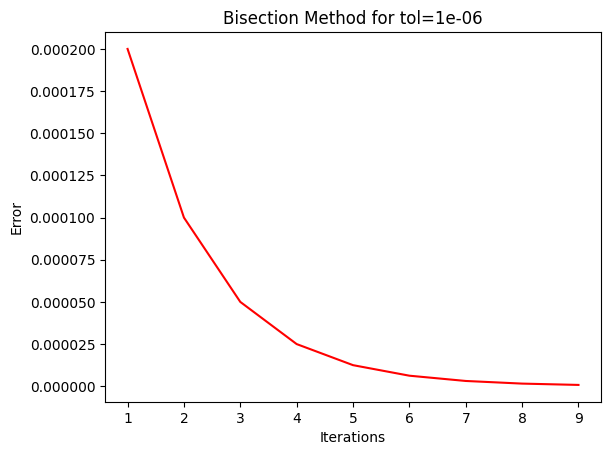

16


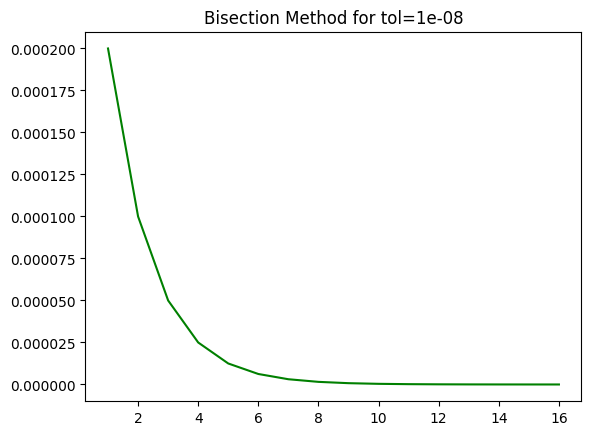

22


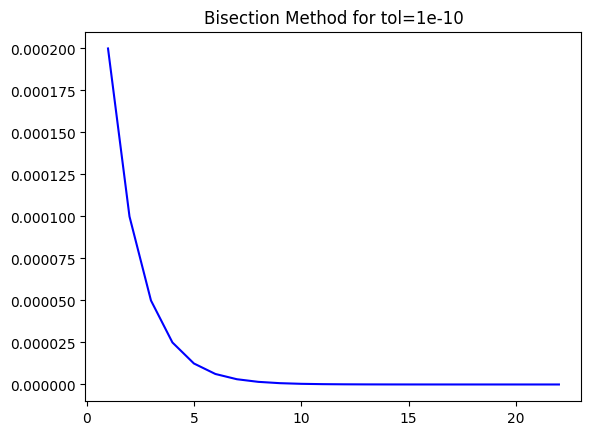

In [22]:


color = ["red", "green", "blue"]
tol_arr = [1e-6, 1e-8, 1e-10]


for (_x, _y, _color, _tol) in zip(itr_array, error_array, color, tol_arr):
    plt.xlabel("Iterations")
    plt.ylabel("Error")

    plt.title(f"Bisection Method for tol={_tol}")
    plt.plot(_x, _y, color=_color)
    plt.show()


### 4) Newton-Raphson


In [23]:
# differentiating fn with respect to Vm
dfn_dVm = sp.diff(fn, Vm)
dfn_dVm


10000000.0 - 0.35034268937713*(Vm - 2.97e-5)/(Vm*(Vm + 2.97e-5)**2) + 0.35034268937713/(Vm*(Vm + 2.97e-5)) - 0.35034268937713*(Vm - 2.97e-5)/(Vm**2*(Vm + 2.97e-5))

In [24]:
itr_table = []
itr_array = []
error_array = []

# NR function


def NR(fn, dfn_dVm, Vm_prev, tol, itr=1):
    decimal_places = int(-sp.log(tol, 10).evalf()+1)

    # NR definition: Xk+1 = Xk - f(k)/f'(k)
    Vm_next = (Vm_prev - fn/dfn_dVm).subs(Vm, Vm_prev).round(decimal_places)
    err = abs(Vm_next - Vm_prev)
    # store the iteration in table
    itr_table.append([itr,
                      Vm_prev,
                      Vm_next,
                      fn.subs(Vm, Vm_prev).round(6),
                      fn.subs(Vm, Vm_next).round(decimal_places),
                      err])
    itr_array[-1].append(itr)
    error_array[-1].append(err)

    # if less than tolerance then return
    if err < tol:
        return Vm_next

    # else go for next iteration
    itr += 1
    return NR(fn, dfn_dVm, Vm_next, tol, itr)


In [25]:
# obtaining value and printing value for tolerance 1e-6

itr_array.append([])
error_array.append([])

itr_table = [['itr', 'Vm_prev', 'Vm_next',
              'fn(Vm_prev)', 'fn(Vm_next)', 'error']]
initial_guess = 0.0005
tolerance = 1e-6
start = time.time()
result_NR = NR(fn, dfn_dVm, initial_guess, tolerance)
end = time.time()
print('Vm:', str(result_NR)+'m3/mol')
print(f'Time taken: {end-start} second')
print(tabulate(itr_table, headers='firstrow', tablefmt='fancy_grid'))


Vm: 0.0001646m3/mol
Time taken: 0.052138328552246094 second
╒═══════╤═════════════╤═════════════╤═══════════════╤═══════════════╤═════════════╕
│   itr │     Vm_prev │     Vm_next │   fn(Vm_prev) │   fn(Vm_next) │       error │
╞═══════╪═════════════╪═════════════╪═══════════════╪═══════════════╪═════════════╡
│     1 │ 0.0005      │ 0.000219399 │   2498.35     │   286.273     │ 0.000280601 │
├───────┼─────────────┼─────────────┼───────────────┼───────────────┼─────────────┤
│     2 │ 0.000219399 │ 0.0001716   │    286.273    │    31.415     │ 4.77992e-05 │
├───────┼─────────────┼─────────────┼───────────────┼───────────────┼─────────────┤
│     3 │ 0.0001716   │ 0.000164799 │     31.415    │     0.871031  │ 6.80052e-06 │
├───────┼─────────────┼─────────────┼───────────────┼───────────────┼─────────────┤
│     4 │ 0.000164799 │ 0.0001646   │      0.871031 │    -0.0092773 │ 1.99303e-07 │
╘═══════╧═════════════╧═════════════╧═══════════════╧═══════════════╧═════════════╛


In [26]:
# obtaining value and printing value for tolerance 1e-8
itr_array.append([])
error_array.append([])
itr_table = [['itr', 'Vm_prev', 'Vm_next',
              'fn(Vm_prev)', 'fn(Vm_next)', 'error']]
initial_guess = 0.0005
tolerance = 1e-8
start = time.time()
result_NR = NR(fn, dfn_dVm, initial_guess, tolerance)
end = time.time()
print('Vm:', str(result_NR)+'m3/mol')
print(f'Time taken: {end-start} second')
print(tabulate(itr_table, headers='firstrow', tablefmt='fancy_grid'))


Vm: 0.000164601m3/mol
Time taken: 0.06464433670043945 second
╒═══════╤═════════════╤═════════════╤════════════════╤═══════════════╤═════════════╕
│   itr │     Vm_prev │     Vm_next │    fn(Vm_prev) │   fn(Vm_next) │       error │
╞═══════╪═════════════╪═════════════╪════════════════╪═══════════════╪═════════════╡
│     1 │ 0.0005      │ 0.000219416 │ 2498.35        │ 286.382       │ 0.000280584 │
├───────┼─────────────┼─────────────┼────────────────┼───────────────┼─────────────┤
│     2 │ 0.000219416 │ 0.000171577 │  286.382       │  31.3118      │ 4.7839e-05  │
├───────┼─────────────┼─────────────┼────────────────┼───────────────┼─────────────┤
│     3 │ 0.000171577 │ 0.000164778 │   31.3118      │   0.773436    │ 6.799e-06   │
├───────┼─────────────┼─────────────┼────────────────┼───────────────┼─────────────┤
│     4 │ 0.000164778 │ 0.000164601 │    0.773436    │  -0.000796796 │ 1.77009e-07 │
├───────┼─────────────┼─────────────┼────────────────┼───────────────┼─────────────┤
│   

In [27]:
# obtaining value and printing value for tolerance 1e-10
itr_array.append([])
error_array.append([])
itr_table = [['itr', 'Vm_prev', 'Vm_next',
              'fn(Vm_prev)', 'fn(Vm_next)', 'error']]
initial_guess = 0.0005
tolerance = 1e-10
start = time.time()
result_NR = NR(fn, dfn_dVm, initial_guess, tolerance)
end = time.time()
print('Vm:', str(result_NR)+'m3/mol')
print(f'Time taken: {end-start} second')
print(tabulate(itr_table, headers='firstrow', tablefmt='fancy_grid'))


Vm: 0.00016460119m3/mol
Time taken: 0.057745933532714844 second
╒═══════╤═════════════╤═════════════╤════════════════╤═══════════════╤═════════════╕
│   itr │     Vm_prev │     Vm_next │    fn(Vm_prev) │   fn(Vm_next) │       error │
╞═══════╪═════════════╪═════════════╪════════════════╪═══════════════╪═════════════╡
│     1 │ 0.0005      │ 0.000219416 │ 2498.35        │ 286.382       │ 0.000280584 │
├───────┼─────────────┼─────────────┼────────────────┼───────────────┼─────────────┤
│     2 │ 0.000219416 │ 0.000171577 │  286.382       │  31.3128      │ 4.78388e-05 │
├───────┼─────────────┼─────────────┼────────────────┼───────────────┼─────────────┤
│     3 │ 0.000171577 │ 0.000164778 │   31.3128      │   0.772551    │ 6.79943e-06 │
├───────┼─────────────┼─────────────┼────────────────┼───────────────┼─────────────┤
│     4 │ 0.000164778 │ 0.000164601 │    0.772551    │   0.000523376 │ 1.765e-07   │
├───────┼─────────────┼─────────────┼────────────────┼───────────────┼─────────────┤
│

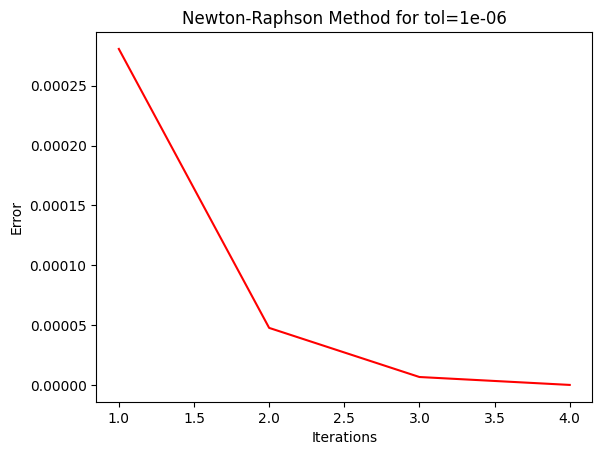

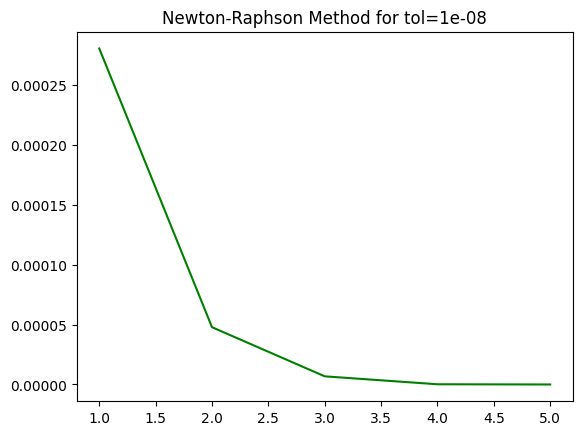

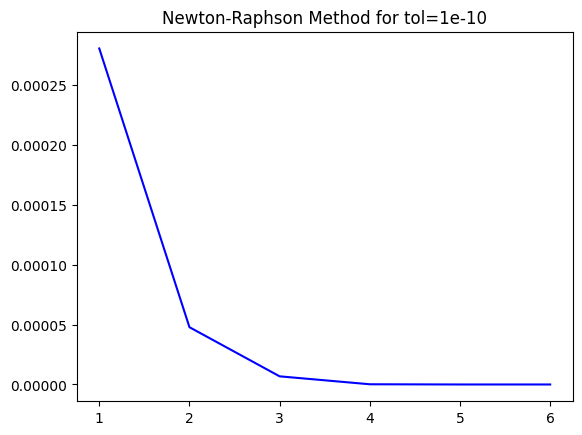

In [28]:


color = ["red", "green", "blue"]
tol_arr = [1e-6, 1e-8, 1e-10]


for (_x, _y, _color, _tol) in zip(itr_array, error_array, color, tol_arr):
    plt.xlabel("Iterations")
    plt.ylabel("Error")
    plt.title(f"Newton-Raphson Method for tol={_tol}")
    plt.plot(_x, _y, color=_color)
    plt.show()
